In [1]:
import myo_raw
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.signal import butter, lfilter

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 20]

### Helper Functions

Time in sec  
Channel in mV  
Quaternion Orientation   
Acceleration in g  
Gyroscopre in rad/s  

In [2]:
# # use raw
# def butter_bandpass(lowcut=20.0, highcut=80.0, fs=200.0, order=4):
#     """ 
#     band-pass filter between 20~495 Hz using 4th-order butterworth filter.
#     https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
#     """
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

In [3]:
# def butter_bandpass_filter(data, lowcut=20.0, highcut=80.0, fs=200.0, order=4):
#     """ 
#     apply band-pass filter between 20~495 Hz using 4th-order butterworth filter.
#     https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
#     """
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

In [4]:
def process_emg(data):
    channel = [f"Channel_{i}" for i in range(1,9)]
    data.columns = ['Time', *channel]
    
    begin = data.iloc[:,0][0]
    data['Time'] = data['Time'].apply(lambda t: t-begin)
    fs_emg = 1/(data['Time'].max()/data.shape[0])
    
    for c in channel:
        data[c] = data[c].apply(lambda s: 1.3*s/(2**8/2))
#         tmp_filtered = butter_bandpass_filter(tmp, fs=fs_emg)

    
    return data , begin

In [5]:
def process_pose(data):
    data.columns = ['Time', 'Pose', 'Pose_Num']
    data['Time'] = data['Time'].apply(lambda t: t-begin)
    start = data.iloc[:,0][0]
    end = data.iloc[:,0][1]
    return data, start, end

In [6]:
def process_imu(data):
    data.columns = ['Time', 'x', 'y', 'z', 'w', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
    data['Time'] = data['Time'].apply(lambda t: t-begin)
    return data

In [7]:
def extract_one_seg(data, start, end):
    data = data[data['Time']<end]
    data = data[data['Time']>start]
#     data = data.set_index('Time')
    data = data.reset_index()
    
    return data

In [8]:
def extract_fixed_time(data, start, end, t=1.5):
    """ t = fixed time segment range """ 
    data = data[data['Time']<(start+t)]
    data = data[data['Time']>start]
#     data = data.set_index('Time')
    data = data.reset_index()
    
    return data

In [9]:
extract_fcn = extract_fixed_time

### Center Data

In [10]:
path = 'data_center'
raw_emg = pd.read_csv(f'{path}/raw_emg.csv')
raw_emg, begin = process_emg(raw_emg)

pose = pd.read_csv(f'{path}/pose.csv')
pose, start, end = process_pose(pose)
display(pose)

emg_center = extract_fcn(raw_emg, start, end)
display(emg_center)

raw_imu = pd.read_csv(f'{path}/raw_imu.csv')
raw_imu = process_imu(raw_imu)
imu_center = extract_fcn(raw_imu, start, end)
display(imu_center)

,Time,Pose,Pose_Num
0,1.397703,WAVE_OUT,3
1,2.590683,REST,0
2,4.344805,WAVE_OUT,3
3,5.759418,REST,0
4,7.581602,WAVE_OUT,3
5,9.255757,REST,0
6,11.050071,WAVE_OUT,3
7,12.938624,REST,0
8,14.916203,WAVE_OUT,3
9,16.485615,REST,0


,index,Time,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,279,1.411384,0.040625,0.081250,0.162500,0.406250,0.253906,0.091406,0.040625,0.010156
1,280,1.413946,-0.091406,-0.142187,-0.325000,-0.670312,-0.416406,-0.111719,-0.081250,-0.040625
2,281,1.444237,0.071094,0.030469,0.000000,-0.294531,-0.213281,-0.060938,0.040625,0.040625
3,282,1.446232,0.000000,0.010156,0.182813,0.690625,0.517969,0.213281,0.000000,-0.030469
4,283,1.448975,-0.020313,0.020313,0.101562,0.101562,0.121875,-0.091406,-0.020313,-0.010156
...,...,...,...,...,...,...,...,...,...,...
281,560,2.882546,-0.020313,-0.010156,-0.010156,0.000000,0.000000,-0.020313,-0.020313,0.000000
282,561,2.889133,-0.020313,-0.010156,-0.020313,-0.050781,-0.040625,-0.040625,-0.010156,-0.010156
283,562,2.891074,-0.050781,-0.050781,-0.060938,-0.040625,-0.020313,0.071094,0.030469,-0.020313
284,563,2.893514,-0.010156,0.010156,0.020313,0.010156,-0.010156,-0.010156,-0.010156,-0.020313


,index,Time,x,y,z,w,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,69,1.441378,-12183,2608,10028,3555,1961,52,395,-21,202,167
1,70,1.451631,-12213,2617,10001,3522,1931,19,384,70,184,216
2,71,1.471576,-12222,2630,10001,3480,1899,-19,203,106,79,196
3,72,1.477252,-12234,2637,9999,3439,1908,-50,296,123,57,170
4,73,1.490733,-12252,2633,9993,3396,2003,5,379,176,76,181
...,...,...,...,...,...,...,...,...,...,...,...,...
67,136,2.809084,-12243,2965,10002,3116,1997,-108,537,-604,-85,39
68,137,2.838381,-12232,3016,9986,3160,2001,-105,535,-392,-61,-19
69,138,2.863400,-12227,3038,9975,3195,1991,-80,499,-232,-19,-60
70,139,2.873897,-12228,3050,9961,3223,1973,-60,465,-168,34,-55


In [11]:
fs_emg = 1/(raw_emg['Time'].max()/raw_emg.shape[0])
print("emg freq = ", fs_emg, " Hz")

fs_imu = 1/(raw_imu['Time'].max()/raw_imu.shape[0])
print("imu freq = ", fs_imu, " Hz")

emg freq =  162.00832731640085  Hz
imu freq =  40.08686549555736  Hz


In [12]:
# fig, ax = plt.subplots(nrows=8, ncols=1)
# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(raw_emg[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

In [13]:
# fig, ax = plt.subplots(nrows=8, ncols=1)

# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(emg_center[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

### Left Data

In [14]:
path = 'data_left'
raw_emg = pd.read_csv(f'{path}/raw_emg.csv')
raw_emg, begin = process_emg(raw_emg)

pose = pd.read_csv(f'{path}/pose.csv')
pose, start, end = process_pose(pose)
display(pose)

emg_left = extract_fcn(raw_emg, start, end)
display(emg_left)

raw_imu = pd.read_csv(f'{path}/raw_imu.csv')
raw_imu = process_imu(raw_imu)
imu_left = extract_fcn(raw_imu, start, end)
display(imu_left)

,Time,Pose,Pose_Num
0,1.134976,WAVE_OUT,3
1,3.077084,REST,0
2,4.885508,WAVE_OUT,3
3,6.790008,REST,0
4,8.815443,WAVE_OUT,3
5,10.600019,REST,0
6,12.624743,WAVE_OUT,3
7,14.529479,REST,0
8,16.502349,WAVE_OUT,3
9,18.219474,REST,0


,index,Time,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,229,1.138244,-0.081250,-0.253906,-0.568750,-0.132031,0.406250,0.071094,-0.010156,-0.050781
1,230,1.140560,-0.071094,-0.121875,-0.182813,0.152344,0.375781,-0.020313,-0.091406,-0.071094
2,231,1.144337,0.010156,-0.020313,-0.325000,-0.142187,-0.182813,0.010156,0.030469,0.020313
3,232,1.146916,0.182813,0.335156,0.873437,0.863281,0.985156,0.385937,0.162500,0.060938
4,233,1.151687,-0.132031,-0.274219,-0.782031,-0.761719,-0.517969,-0.162500,-0.060938,-0.030469
...,...,...,...,...,...,...,...,...,...,...
295,524,2.605923,-0.010156,-0.091406,-0.223438,-0.101562,0.233594,0.060938,0.010156,-0.040625
296,525,2.612135,0.040625,0.081250,0.223438,-0.203125,-0.284375,-0.132031,-0.060938,0.030469
297,526,2.614039,-0.071094,-0.121875,-0.335156,-0.111719,0.050781,0.020313,-0.030469,-0.010156
298,527,2.620949,-0.060938,-0.152344,-0.406250,-0.335156,-0.355469,-0.040625,-0.010156,-0.030469


,index,Time,x,y,z,w,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,59,1.141566,-11281,4480,9147,6117,1918,83,422,257,283,-15
1,60,1.160226,-11316,4431,9139,6101,1956,3,403,288,252,-52
2,61,1.189437,-11350,4367,9149,6070,1928,-12,413,426,180,-79
3,62,1.205579,-11382,4290,9170,6032,1908,57,379,509,168,-76
4,63,1.217249,-11398,4224,9205,5995,1837,143,277,455,80,-61
...,...,...,...,...,...,...,...,...,...,...,...,...
70,129,2.541308,-11371,4299,9221,5968,1945,97,478,19,-2,8
71,130,2.558680,-11371,4295,9224,5967,1925,139,427,18,9,11
72,131,2.587102,-11373,4299,9217,5971,1936,95,470,-42,20,14
73,132,2.601625,-11375,4304,9212,5971,1921,68,479,-19,5,15


In [15]:
fs_emg = 1/(raw_emg['Time'].max()/raw_emg.shape[0])
print("emg freq = ", fs_emg, " Hz")

fs_imu = 1/(raw_imu['Time'].max()/raw_imu.shape[0])
print("imu freq = ", fs_imu, " Hz")

emg freq =  199.76563191585925  Hz
imu freq =  50.13505828253831  Hz


In [16]:
# fig, ax = plt.subplots(nrows=8, ncols=1)

# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(raw_emg[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

In [17]:
# fig, ax = plt.subplots(nrows=8, ncols=1)

# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(emg_left[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

### Right Data

In [18]:
path = 'data_right'
raw_emg = pd.read_csv(f'{path}/raw_emg.csv')
raw_emg, begin = process_emg(raw_emg)

pose = pd.read_csv(f'{path}/pose.csv')
pose, start, end = process_pose(pose)
display(pose)

emg_right = extract_fcn(raw_emg, start, end)
display(emg_right)

raw_imu = pd.read_csv(f'{path}/raw_imu.csv')
raw_imu = process_imu(raw_imu)
imu_right = extract_fcn(raw_imu, start, end)
display(imu_right)

,Time,Pose,Pose_Num
0,0.928604,FINGERS_SPREAD,4
1,2.970377,REST,0
2,4.675031,FINGERS_SPREAD,4
3,6.468985,REST,0
4,8.282201,WAVE_OUT,3
5,10.193223,REST,0
6,12.235111,WAVE_OUT,3
7,14.072217,REST,0
8,16.193586,FINGERS_SPREAD,4
9,18.156223,REST,0


,index,Time,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,189,0.935055,-0.111719,-0.142187,-0.264063,-0.385937,-0.629688,-0.335156,-0.182813,-0.111719
1,190,0.937571,0.121875,0.213281,0.446875,0.903906,0.223438,-0.081250,0.000000,0.050781
2,191,0.942859,-0.223438,-0.274219,-0.396094,-0.710938,-0.182813,-0.629688,-0.172656,-0.111719
3,192,0.944706,0.081250,0.081250,-0.162500,-0.253906,0.396094,0.385937,0.121875,0.010156
4,193,0.948240,-0.030469,-0.010156,0.091406,-0.365625,-0.782031,-0.162500,-0.020313,0.010156
...,...,...,...,...,...,...,...,...,...,...
291,480,2.396822,0.020313,0.000000,-0.030469,-0.132031,0.162500,0.264063,0.040625,0.010156
292,481,2.412589,-0.030469,-0.010156,0.010156,-0.020313,-0.446875,-0.192969,-0.071094,-0.040625
293,482,2.414407,-0.071094,-0.091406,0.050781,0.152344,-0.589063,-0.446875,-0.152344,-0.040625
294,483,2.417633,0.030469,0.081250,0.050781,0.060938,0.081250,0.223438,0.111719,0.020313


,index,Time,x,y,z,w,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,48,0.945491,-8831,7868,7915,8117,2056,-50,143,342,-82,526
1,49,0.955978,-8903,7894,7903,8025,2005,-124,151,334,-92,569
2,50,0.969267,-8988,7903,7910,7912,1946,-94,-11,527,-45,595
3,51,0.983252,-9069,7907,7910,7815,2046,-116,68,472,-16,551
4,52,1.004316,-9155,7910,7902,7719,2022,-151,101,461,14,563
...,...,...,...,...,...,...,...,...,...,...,...,...
70,118,2.336838,-9440,8174,7843,7140,1997,-294,80,8,11,41
71,119,2.362592,-9438,8180,7840,7140,1989,-303,70,-33,2,25
72,120,2.379244,-9437,8180,7840,7140,2010,-325,82,-8,2,12
73,121,2.392565,-9443,8174,7845,7135,1991,-311,82,61,2,7


In [19]:
fs_emg = 1/(raw_emg['Time'].max()/raw_emg.shape[0])
print("emg freq = ", fs_emg, " Hz")

fs_imu = 1/(raw_imu['Time'].max()/raw_imu.shape[0])
print("imu freq = ", fs_imu, " Hz")

emg freq =  192.3810346151094  Hz
imu freq =  48.05190285149589  Hz


In [20]:
# fig, ax = plt.subplots(nrows=8, ncols=1)

# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(raw_emg[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

In [21]:
# fig, ax = plt.subplots(nrows=8, ncols=1)

# for i  in range(8):
#     col = emg_center.columns[i+2]
#     f, Pxx_den = signal.periodogram(emg_right[col], fs_emg)
#     ax[i].semilogy(f, Pxx_den)
#     ax[i].set_ylim((1e-7, 1e2))
#     ax[i].set_xlabel('frequency [Hz]')
#     ax[i].set_ylabel(f'{col} PSD [V**2/Hz]')

### Compare data

In [22]:
# df = emg_center.merge(emg_left, left_index=True, right_index=True, suffixes=('_center', '_left'))
# merge_df = df.merge(emg_right.add_suffix('_right'), left_index=True, right_index=True)
# display(merge_df.head())

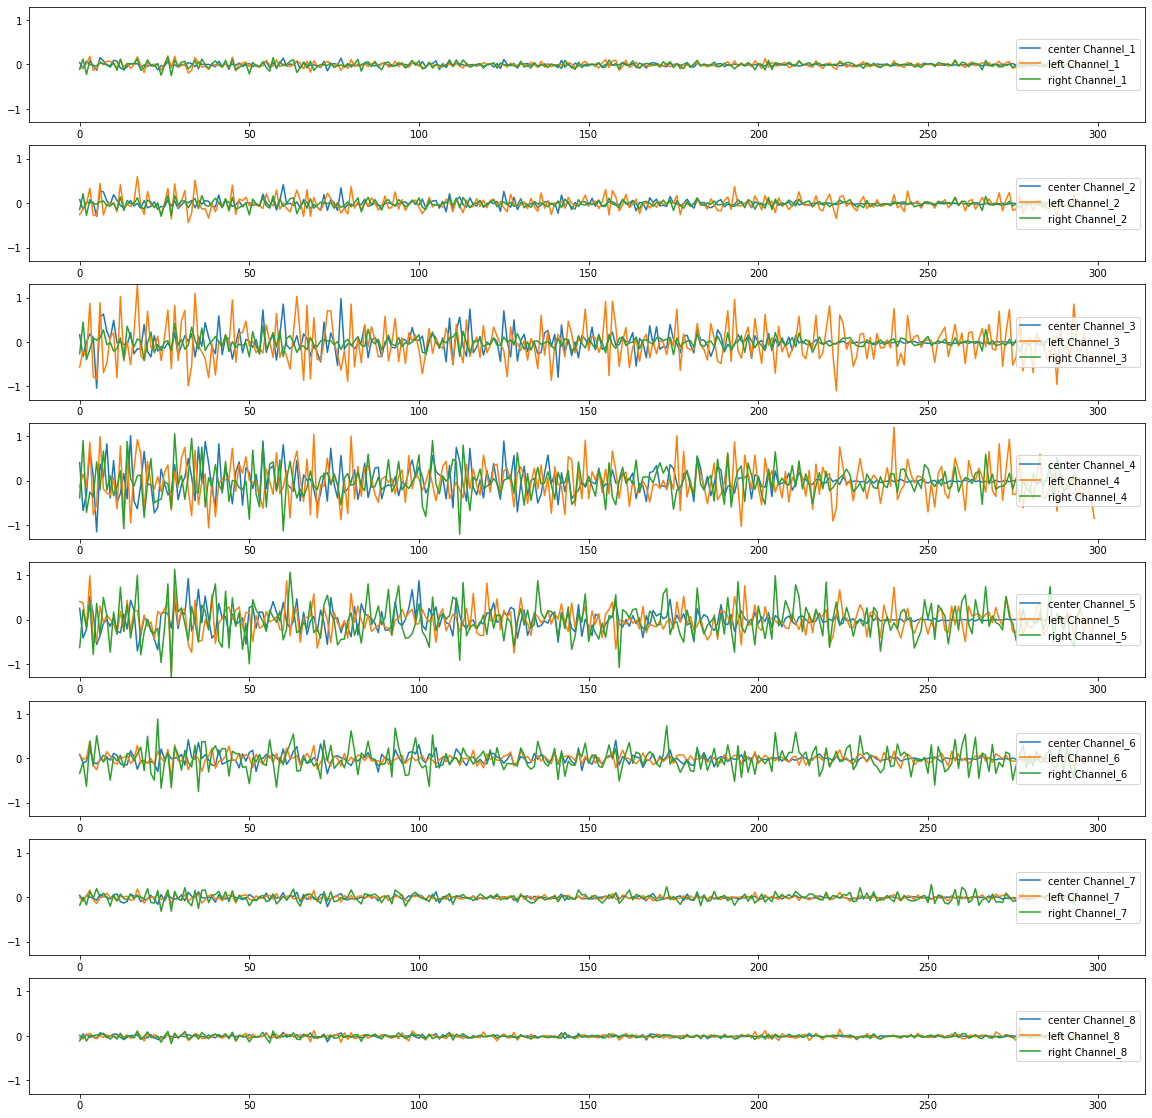

In [26]:
#  5sec
fig, axes = plt.subplots(nrows=8, ncols=1)

for i  in range(8):
    col = emg_center.columns[i+2]
    emg_center[col].plot(ax=axes[i], label=f'center {col}')
    emg_left[col].plot(ax=axes[i], label=f'left {col}')
    emg_right[col].plot(ax=axes[i], label=f'right {col}')
    axes[i].set_ylim((-1.3,1.3))
    leg = axes[i].legend(loc='right')   
    
fig.savefig("img/emg_one_seg.jpg")

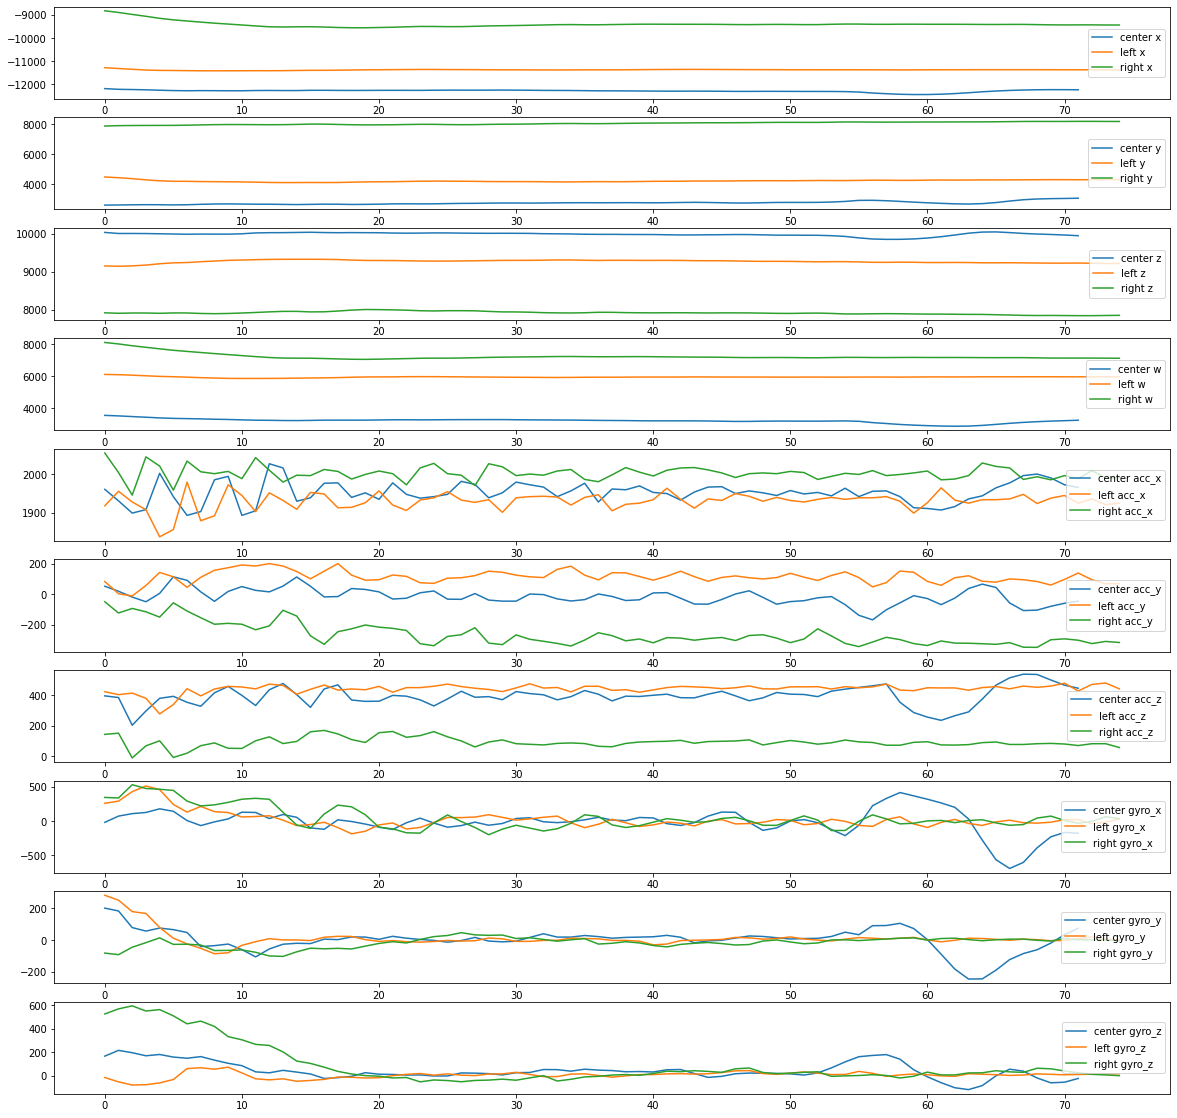

In [24]:
fig, axes = plt.subplots(nrows=10, ncols=1)

for i  in range(10):
    col = imu_center.columns[i+2]
    imu_center[col].plot(ax=axes[i], label=f'center {col}')
    imu_left[col].plot(ax=axes[i], label=f'left {col}')
    imu_right[col].plot(ax=axes[i], label=f'right {col}')
    leg = axes[i].legend(loc='right')   
    
fig.savefig("img/imu_one_seg.jpg")

In [25]:
# check units of acc and gyro, EMG

https://www.researchgate.net/publication/324889539_Technical_Features_and_Functionalities_of_Myo_Armband_An_Overview_on_Related_Literature_and_Advanced_Applications_of_Myoelectric_Armbands_Mainly_Focused_on_Arm_Prostheses


the MPU-9150 is featured with three 16-bit analog-to-digital converters (ADCs) used to digitize the gyroscope outputs, three 16-bit ADCs used to digitize the accelerometer outputs and three 13-bit ADCs used to digitize the magnetometer outputs (MPU-9150 Product Speciﬁcation Revision 4.3, 2013). The MPU-9150 IMU is soldered on the bottom side of the Myo armband control board, as highlighted in Figure 37

?   

gyro in 16-bit  
acc in 16-bits  
Magnetometer in 13-bits  

https://invensense.tdk.com/wp-content/uploads/2015/02/MPU-9150-Datasheet.pdf

VDD = 3.3 V  
VLOGIC = 1.71 ~ 3.3 V  
DIGITAL INPUTS   
    &emsp; VIH, High Level Input Voltage = 0.7*VLOGIC   
    &emsp; VIL, Low Level Input Voltage = 0.3*VLOGIC   
 
 straight down, 1g at z

http://www.starlino.com/imu_guide.html